1. The columns I chose are printed in the second code block. I chose those columns because they did not have a lot of blank spaces or useless data, such as contact info, and I did not want to include data with short time spands, such as one month. All in all, I just removed the columns I thought were irrelevent. 

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import neighbors, preprocessing, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/LoanDefaultData.csv')
df=df.fillna(-9999)
df=df.reset_index(drop=True)
df

,loan_default,AP001,AP004,TD005,TD006,TD009,TD010,TD013,TD014,TD015,CR004,CR005,CR009,CR012,CR015,CR017,CR018,CR019,PA022,PA023,PA028,PA029,PA030,PA031,CD008,CD018,CD071,CD072,CD088,CD100,CD101,CD106,CD107,CD108,CD113,CD114,CD115,CD117,CD118,CD120,CD121,CD123,CD130,CD131,CD132,CD133,CD135,CD136,CD137,CD152,CD153,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173
0,1,31,12,4,1,5,1,14,2,2,2,1,35807,0,4,4,3,2,-1.0,-1.0,-98.0,-98.0,-98.0,-98.0,13840.0,172.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,57.0,48.0,95.0,79.0,125.0,103.0,43.0,55.0,56.0,52.0,65.0,91.0,96.0,10900.0,12757.0,8.0,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0
1,0,27,12,3,1,3,1,3,2,0,3,1,7254,0,6,7,6,11,-1.0,-1.0,-98.0,-98.0,-98.0,-98.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
2,0,33,12,4,1,5,1,9,1,2,2,2,30377,0,2,2,2,3,-1.0,-1.0,-98.0,-98.0,-98.0,-98.0,2454.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,20.0,20.0,23.0,21.0,11.0,9.0,10.0,12.0,13.0,9.0,11.0,3807.0,2314.0,0.0,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0
3,0,34,12,0,0,0,0,1,1,0,2,1,0,0,5,7,7,8,-1.0,-1.0,-98.0,-98.0,-98.0,-98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,47,12,2,1,2,1,2,1,0,4,2,0,0,6,8,7,11,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0,39,12,2,0,4,0,8,3,1,4,2,16716,0,5,5,5,6,-1.0,-1.0,-98.0,-98.0,-98.0,-98.0,4450.0,279.0,22.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,26.0,52.0,42.0,68.0,55.0,46.0,128.0,129.0,50.0,56.0,153.0,154.0,13453.0,4866.0,5.0,15.0,8.0,864.0,684.0,1261.0,764.0,2600.0,1074.0
79996,0,31,12,2,0,2,0,2,0,0,1,1,3388,0,5,7,4,5,-1.0,-1.0,-98.0,-98.0,-98.0,-98.0,13343.0,646.0,52.0,31.0,20.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,84.0,58.0,118.0,84.0,139.0,101.0,147.0,111.0,121.0,174.0,177.0,141.0,160.0,11341.0,9189.0,25.0,25.0,25.0,6177.0,6177.0,6426.0,6426.0,6426.0,6426.0
79997,0,37,12,1,2,1,2,2,2,1,2,1,0,0,3,5,5,6,-1.0,-1.0,-98.0,-98.0,-98.0,-98.0,4123.0,60.0,34.0,0.0,29.0,2.0,2.0,4.0,4.0,0.0,2.0,4.0,38.0,27.0,84.0,60.0,112.0,87.0,9.0,1.0,12.0,75.0,9.0,2.0,12.0,1185.0,5497.0,13.0,14.0,13.0,1116.0,1116.0,2061.0,2061.0,2501.0,2061.0
79998,0,38,12,0,0,0,0,0,0,0,2,1,20200,0,4,5,5,5,-1.0,-1.0,-98.0,-98.0,-98.0,-98.0,3962.0,313.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,28.0,60.0,42.0,70.0,51.0,128.0,153.0,153.0,128.0,151.0,154.0,178.0,10187.0,7452.0,2.0,5.0,2.0,25.0,0.0,498.0,343.0,514.0,343.0


df_copy is the csv with no missing data

In [ ]:
df_copy = df.copy()
df_copy = df.loc[:, (df >= 0).all()]
df_copy

,loan_default,AP001,AP004,TD005,TD006,TD009,TD010,TD013,TD014,TD015,CR004,CR005,CR009,CR012,CR015,CR017,CR018,CR019
0,1,31,12,4,1,5,1,14,2,2,2,1,35807,0,4,4,3,2
1,0,27,12,3,1,3,1,3,2,0,3,1,7254,0,6,7,6,11
2,0,33,12,4,1,5,1,9,1,2,2,2,30377,0,2,2,2,3
3,0,34,12,0,0,0,0,1,1,0,2,1,0,0,5,7,7,8
4,0,47,12,2,1,2,1,2,1,0,4,2,0,0,6,8,7,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0,39,12,2,0,4,0,8,3,1,4,2,16716,0,5,5,5,6
79996,0,31,12,2,0,2,0,2,0,0,1,1,3388,0,5,7,4,5
79997,0,37,12,1,2,1,2,2,2,1,2,1,0,0,3,5,5,6
79998,0,38,12,0,0,0,0,0,0,0,2,1,20200,0,4,5,5,5


In [ ]:
def modelsR(X_train, X_test, y_train, y_test):
  knn = neighbors.KNeighborsClassifier()
  knn.fit(X_train, y_train)
  accuracy = knn.score(X_test, y_test)
  print("knn acc: ")
  print(accuracy)

  logmodel = LogisticRegression()
  logmodel.fit(X_train, y_train)
  predictions = logmodel.predict(X_test)
  print("log stats: ")
  print(classification_report(y_test, predictions))
  probs_y=logmodel.predict_proba(X_test) 

  fpr, tpr, thresholds = metrics.roc_curve(y_test,probs_y[:,1])

  plt.plot(fpr, tpr)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.rcParams['font.size'] = 12
  plt.title('ROC curve for behavior classifier - Log Reg Model')
  plt.xlabel('False Positive Rate (1 - Specificity)')
  plt.ylabel('True Positive Rate (Sensitivity)')
  plt.grid(True)

  model = BernoulliNB()  
  model.fit(X_train, y_train)      
  y_model = model.predict(X_test)
  print("NB acc: ")
  return (accuracy_score(y_test, y_model))

knn acc: 
0.773375
log stats: 
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     12875
           1       0.32      0.03      0.05      3125

    accuracy                           0.80     16000
   macro avg       0.56      0.51      0.47     16000
weighted avg       0.71      0.80      0.72     16000

NB acc: 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7153125

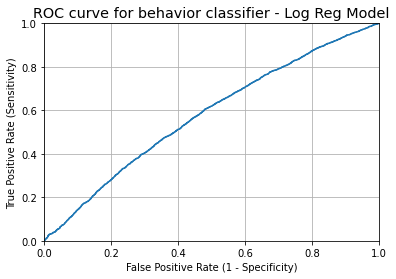

In [ ]:
y = np.array(df['loan_default'])
X= np.array(df.drop(['loan_default'],1))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
modelsR(X_train, X_test, y_train, y_test)

knn acc: 
0.7719375
log stats: 
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     12880
           1       0.26      0.02      0.04      3120

    accuracy                           0.80     16000
   macro avg       0.53      0.50      0.46     16000
weighted avg       0.70      0.80      0.72     16000

NB acc: 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.76925

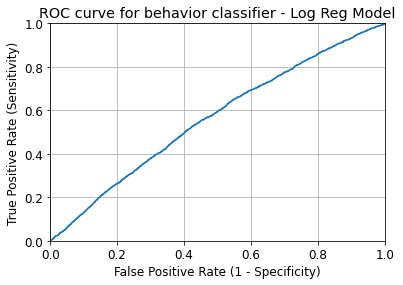

In [ ]:
X= np.array(df.drop(['loan_default','AP001','TD005','TD006','TD009','CR004','CR012','CR018','CR019','PA022','PA023',
                     'PA029','CD100'],1))
y = np.array(df['loan_default'])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
modelsR(X_train, X_test, y_train, y_test)

knn acc: 
0.773625
log stats: 
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     12858
           1       0.25      0.02      0.03      3142

    accuracy                           0.80     16000
   macro avg       0.53      0.50      0.46     16000
weighted avg       0.70      0.80      0.72     16000

NB acc: 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7691875

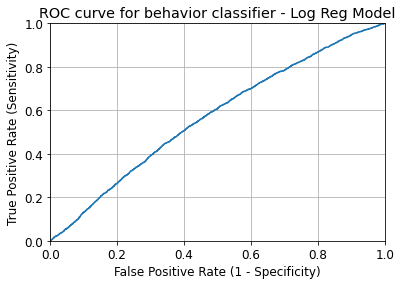

In [ ]:
X= np.array(df.drop(['loan_default','AP001','TD005','TD006','TD009','CR004','CR012','CR018','CR019','PA022','PA023',
                     'PA029',],1))
y = np.array(df['loan_default'])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
modelsR(X_train, X_test, y_train, y_test)

knn acc: 
0.7727916666666667
log stats: 
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     19321
           1       0.27      0.02      0.03      4679

    accuracy                           0.80     24000
   macro avg       0.54      0.50      0.46     24000
weighted avg       0.70      0.80      0.72     24000

NB acc: 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7670833333333333

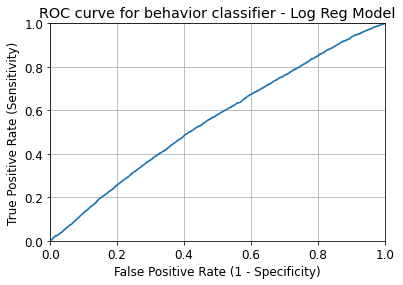

In [ ]:
X= np.array(df.drop(['loan_default','AP001','TD005','TD006','TD009','CR004','CR012','CR018','CR019','PA022','PA023',
                     'PA029','CD100'],1))
y = np.array(df['loan_default'])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)
modelsR(X_train, X_test, y_train, y_test)

knn acc: 
0.7722083333333334
log stats: 
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     19298
           1       0.25      0.02      0.04      4702

    accuracy                           0.80     24000
   macro avg       0.53      0.50      0.46     24000
weighted avg       0.70      0.80      0.72     24000

NB acc: 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7702916666666667

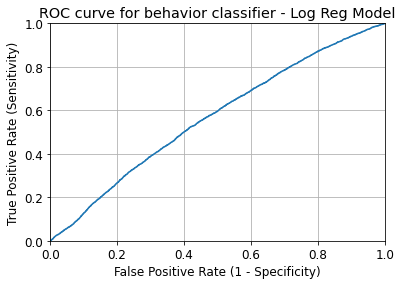

In [ ]:
X= np.array(df.drop(['loan_default','AP001','TD005','TD006','TD009','CR004','CR012','CR018','CR019','PA022','PA023',
                     'PA029','CD100','CD167','CD115','CD117'],1))
y = np.array(df['loan_default'])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)
modelsR(X_train, X_test, y_train, y_test)

knn acc: 
0.77975
log stats: 
              precision    recall  f1-score   support

           0       0.81      1.00      0.90     12959
           1       0.61      0.00      0.01      3041

    accuracy                           0.81     16000
   macro avg       0.71      0.50      0.45     16000
weighted avg       0.77      0.81      0.73     16000

NB acc: 


0.8099375

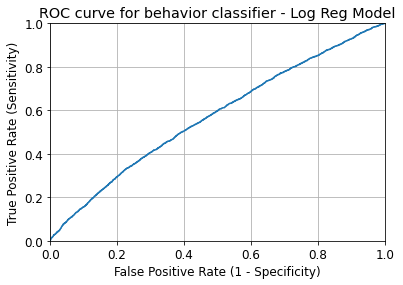

In [ ]:
y = np.array(df_copy['loan_default'])
X= np.array(df_copy.drop(['loan_default'],1))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
modelsR(X_train, X_test, y_train, y_test)

knn acc: 
0.782875
log stats: 
              precision    recall  f1-score   support

           0       0.81      1.00      0.90     12976
           1       0.24      0.00      0.00      3024

    accuracy                           0.81     16000
   macro avg       0.52      0.50      0.45     16000
weighted avg       0.70      0.81      0.73     16000

NB acc: 


0.811

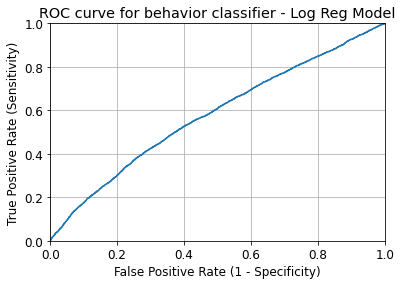

In [ ]:
X= np.array(df_copy.drop(['loan_default','AP004'],1))
y = np.array(df_copy['loan_default'])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
modelsR(X_train, X_test, y_train, y_test)

knn acc: 
0.7800625
log stats: 
              precision    recall  f1-score   support

           0       0.81      1.00      0.90     12986
           1       0.61      0.00      0.01      3014

    accuracy                           0.81     16000
   macro avg       0.71      0.50      0.45     16000
weighted avg       0.77      0.81      0.73     16000

NB acc: 


0.811625

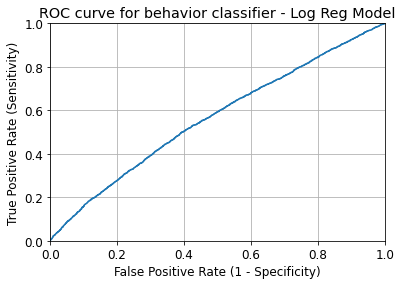

In [ ]:
X= np.array(df_copy.drop(['loan_default','AP004','TD006'],1))
y = np.array(df_copy['loan_default'])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
modelsR(X_train, X_test, y_train, y_test)